# Getting Started

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
import ontime as on

## Generation of random time series

In [3]:
def generate_random_time_series(start, end, freq='D'):
    date_rng = pd.date_range(start=start, end=end, freq=freq)
    random_data = np.random.randn(len(date_rng))
    ts = pd.DataFrame(random_data, index=date_rng, columns=['values'])
    return ts


In [4]:
ts = generate_random_time_series('2022-01-01', '2022-12-31')

In [5]:
ts

values
2022-01-01 -0.405951
2022-01-02 -0.070564
2022-01-03 -2.264029
2022-01-04 -0.447855
2022-01-05  0.418300
...              ...
2022-12-27 -0.376309
2022-12-28  1.214681
2022-12-29 -1.949244
2022-12-30 -0.520153
2022-12-31 -0.326135

[365 rows x 1 columns]

## Use `TimeSeries` object

In [6]:
ts = on.TimeSeries.from_dataframe(ts)

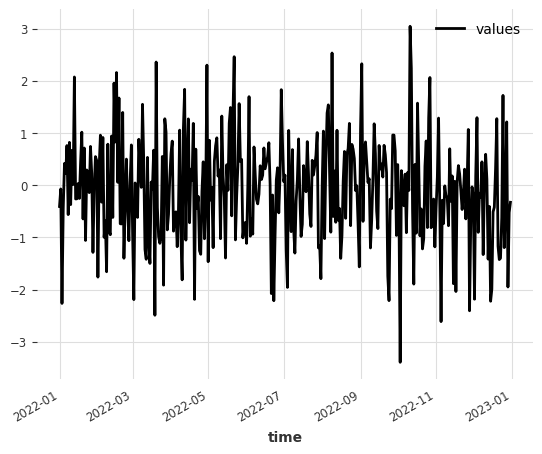

In [7]:
ts.plot();

---
## Test the creation of custom classes

### Create custom model

In [8]:
from ontime.abstract import AbstractBaseModel

class MyModel(AbstractBaseModel):

    def __init__(self):
        super().__init__()

    def fit(self, series):
        super().fit(series)
        print('I am fitted')

    def predict(self, horizon):
        super().predict(horizon)
        print('I see the horizon')
    

Load custom model in OnTime

In [9]:
on.models.get_all()

[]

In [10]:
on.models.load('my_model', MyModel) 
on.models.get_all()

['my_model']

In [11]:
on.models.my_model.predict(ts)

Exception: fit() must be called before predict()

In [12]:
on.models.my_model.fit(ts)

I am fitted


In [13]:
on.models.my_model.predict(ts)

I see the horizon


### Create custom detector

In [14]:
from ontime.abstract import AbstractBaseDetector

class MyDetector(AbstractBaseDetector):

    def __init__(self):
        super().__init__()

    def detect(self, ts):
        print('I detected')
        

Load custom detector in OnTime

In [15]:
on.detectors.get_all()

[]

In [16]:
on.detectors.load('my_detector', MyDetector)

In [17]:
on.detectors.get_all()

['my_detector']

In [18]:
on.detectors.my_detector.detect(ts)

I detected
